# Precio Promedio un Libro en Colombia

La finalidad de este proyecto, es poder conocer el precio promedio de venta al público de libros nuevos impresos y digitales en el país, tomando como referencia a una de las principales librerias de venta de libros online en el país, Libreria de la U (https://www.libreriadelau.com/), que cuenta con un catálogo de más de cien mil publicaciones de libros en internet.

El ejercicio se llevó a cabo en el mes de Marzo de 2020.

In [1]:
import requests
import pandas as pd
from scrapy.selector import Selector
from scrapy.http import TextResponse
import re
import unidecode
import json

Las publicaciones en la página están embebidas en formato plano, por lo cual, es necesario trabajar con *json*

También es necesario, debido a las restricciones de la página, iterar sobre los años de publicación, para extraer todos los resultados posibles

In [9]:
# Lista de Año de Edición

request = requests.get('https://www.libreriadelau.com/'
                       'temas-varios/?O=OrderByReleaseDateDESC')

response = TextResponse(request.url, body=request.text, encoding='utf-8')
num = response.xpath("//ul[@class='Año de Edición  Atributos LU']/li/a/@title").extract()

num_ediciones = list(dict.fromkeys(num)) # removiendo duplicados
print(num_ediciones)
print('\Resultados:',len(num_ediciones))

# Resultados por Edición
year = response.xpath("//ul[@class='Año de Edición  Atributos LU']/li/a/text()").re(r'\(([^)]+)')
yearm = list(dict.fromkeys(year)) # removiendo duplicados

ediciones=[]
for i in yearm:
    ediciones.append(int(i))
print('\nResultados por Edición:','\nTotales:',sum(ediciones), '\nMax:',max(ediciones),'\n')

ediciones.sort(reverse=True)

print(ediciones)

In [10]:
# iteration

# Estructura del sitio web

desde = 0
hasta = 19

num_ediciones = num_ediciones[41:] # partir a la mitad para que no sea tan pesado

# Varialbles a obtener
autor,editorial,edicion,pag,ISBN,tipo,formato,titulo,categoria,precio,file,size,peso,tamano,acabado,link = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

while desde<=max(ediciones) and hasta<=(max(ediciones)+19):
    
    for i in num_ediciones:
        
        # La categoria de los libro tiene que cambiarse para repetir el proceso
        request = requests.get('https://www.libreriadelau.com/api/catalog_system/pub/products/search/'
            'temas-varios/'+i+'?O=OrderByPriceDESC&map=c,'
           'c,specificationFilter_71&_from='+str(desde)+'&_to='+str(hasta))

        response = TextResponse(request.url, body=request.text, encoding='utf-8')
        
        try:
            data = json.loads(response.text)
        
            if len(data)==0:
                pass

            else:
                for i in data:
                    try: autor.append(i['Autor'][0])
                    except Exception: autor.append(None)

                    try: editorial.append(i['Editorial'][0])
                    except Exception: editorial.append(None)

                    try: edicion.append(i['Año de Edición'][0])
                    except Exception: edicion.append(None)

                    try: pag.append(i['Núm. Páginas'][0])
                    except Exception: pag.append(None)

                    try: ISBN.append(i['ISXN'][0])
                    except Exception: ISBN.append(None)

                    try: tipo.append(i['Tipo'][0])
                    except Exception: tipo.append(None)

                    try: formato.append(i['items'][0]['Formato'][0])
                    except Exception: formato.append(None)

                    try: titulo.append(i['Título'][0])
                    except Exception: titulo.append(None)

                    try: categoria.append(i['categories'][0])
                    except Exception: categoria.append(None)

                    try: precio.append(i['items'][0]['sellers'][0]['commertialOffer']['ListPrice'])
                    except Exception: precio.append(None)

                    try: file.append(i['Formato Electrónico (Virtual)'][0])
                    except Exception:file.append(None)

                    try: size.append(i['Tamaño Archivo (Virtual)'][0])
                    except Exception: size.append(None)

                    try: peso.append(i['Peso (Físico)'][0])
                    except Exception: peso.append(None)

                    try: tamano.append(i['Tamaño (Físico)'][0])
                    except Exception: tamano.append(None)

                    try: acabado.append(i['Acabado (Físico)'][0])
                    except Exception: acabado.append(None)

                    try: link.append(i['link'])
                    except Exception: link.append(None)

        except Exception:
            pass
        
    desde += 20
    hasta += 20

# Carga en Pandas
f = pd.DataFrame(data=[autor,editorial,edicion,pag,ISBN,tipo,formato,titulo,categoria,precio,file,size,peso,tamano,acabado,link], index=None)
df=f.transpose()
df.columns=['Autor','Editorial','Edicion','Paginas','ISBN','Tipo','Formato','Titulo','Categoria','Precio','File','Size-MB','Peso','Tamaño','Acabado','Link']

In [11]:
# Export/Import
df.to_csv(r'C:\Users\AndyJ\Desktop\App Libros\Libreria\temas-varios3.csv')

In [1]:
# Import CSVs en uno solo

import pandas as pd
import glob

path = r'C:\Users\AndyJ\Desktop\App Libros\Libreria'

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, dtype={
        'Acabado':'str','Autor':'str','Categoria':'str','Edicion':'str','Editorial':'str','File':'str','Formato':'str',
        'ISBN':'str','Link':'str','Paginas':'float64','Peso':'float64','Precio':'float64','Tamaño':'str','Tipo':'str',
        'Tiutlo':'str'},low_memory=False)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.tail(2)

,Acabado,Autor,Categoria,Edicion,Editorial,File,Formato,ISBN,Link,Paginas,Peso,Precio,Size-MB,Tamaño,Tipo,Titulo,Unnamed: 0
380153,NaN,NaN,/Veterinaria y Zootecnia/,1900,Distribuciones Agapea Libros Urgentes,NaN,Libro Importado,9788494404856,https://www.libreriadelau.com/ag-los-vencejos-...,282.0,367.0,0.0,NaN,0 x 0 cm,Libro Importado,NaN,883.0
380154,NaN,"Produmedios, Producción de Medios de Comunicación",/Veterinaria y Zootecnia/,1900,NaN,NaN,DVD,N. D.,https://www.libreriadelau.com/las-garrapatas-y...,NaN,90.0,0.0,NaN,13.5 x 19 cm,DVD,Las garrapatas y su ciclo de vida,884.0


In [2]:
# Eliminar Columna 
df.drop(columns='Unnamed: 0', inplace=True)

# Eliminar libros cuyo precio==0
df.drop(df[df.Precio<=10000].index,inplace=True)
df.drop(df[df.Precio>=300000].index,inplace=True)

# Eliminar duplicados
df.drop_duplicates(keep='first', inplace=True)

# Reset Index
df.reset_index(drop=True, inplace=True)

# Separar Categoria en dos
df[['Cat0','Cat','Gen','Gen0']] = df.Categoria.str.split("/",expand=True)

# # Eliminar Columnas
df.drop(columns=['Cat0','Gen0'], inplace=True)

df.tail(2)

,Acabado,Autor,Categoria,Edicion,Editorial,File,Formato,ISBN,Link,Paginas,Peso,Precio,Size-MB,Tamaño,Tipo,Titulo,Cat,Gen
167868,NaN,Hogares Juveniles Campesinos,/Veterinaria y Zootecnia/,1900,NaN,NaN,DVD,7777777777732,https://www.libreriadelau.com/cerdos-reproducc...,0.0,110.0,20000.0,NaN,13.5 x 19 cm,DVD,Cerdos. Reproducción,Veterinaria y Zootecnia,
167869,NaN,Alexandra Horowitz,/Veterinaria y Zootecnia/,2013,NaN,EPUB,eBook,9788498679663,https://www.libreriadelau.com/lib-en-la-mente-...,352.0,0.0,16600.0,0.46,NaN,eBook,En la mente de un perro,Veterinaria y Zootecnia,


In [3]:
# Peso promedio de un ebook
df['Size-MB'].mean()

4.232058082877649

In [5]:
# Precio promedio por Formato
df.groupby('Formato').agg(['mean','count'])['Precio'].sort_values('count', ascending=False)

,mean,count
Formato,,
eBook,29784.759258,67213
Libro Importado,63914.236179,55949
Libro Impreso,53093.765744,26454
Norma Técnica Colombiana,48709.915716,6051
Revista,23442.315470,989
Impreso Bajo Demanda,63607.676349,482
Documento de Investigación,60461.250000,320
Audiolibro,25099.264706,136
DVD,22965.289256,121


In [192]:
impreso = (df['Formato']=='Libro Impreso') | (df['Formato']=='Libro Importado')
ebook = (df['Formato']=='eBook')

In [331]:
# Precio al público más frecuente
df[impreso].Precio.mode()

0    30000.0
dtype: float64

In [215]:
# Precio promedio por Categoria
df[impreso].groupby('Cat').agg(['mean','count'])['Precio'].sort_values(by='mean', ascending=False)

,mean,count
Cat,,
Veterinaria y Zootecnia,84993.925234,214
Libros sobre Informática,80794.687500,320
Libros sobre Ciencias de la Salud,78081.029975,1201
Libros de Educación Física y Deporte,75322.289157,498
Libros de Ingeniería,73485.085694,1412
Libros de Arte Arquitectura y Diseño,70650.068618,2186
Libros de Derecho,68710.144129,2921
Libros sobre Ciencias Naturales,68223.986486,888
Libros de Biografías y Autobiografías,65663.612565,382


In [216]:
# Precio promedio Ebook por Categoria
df[ebook].groupby('Cat').agg(['mean','count'])['Precio'].sort_values(by='mean', ascending=False)

,mean,count
Cat,,
Libros de Derecho,45857.573290,1228
Libros sobre Ciencias de la Salud,43993.908046,870
Libros de Ingeniería,43482.477341,331
Libros de Educación Física y Deporte,38912.652068,411
Libros sobre Ciencias Políticas,38715.293342,1517
Veterinaria y Zootecnia,38251.376147,109
Libros de Arte Arquitectura y Diseño,36514.021739,1380
Libros de Lingüística y Lenguas,36084.447476,733
Libros sobre Ciencias Naturales,34179.963810,525


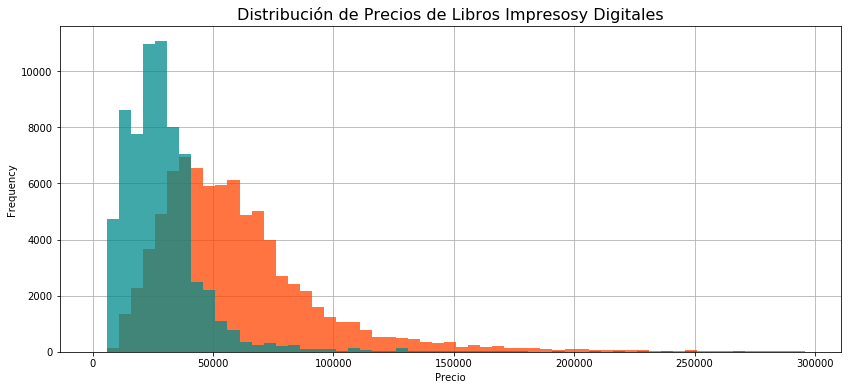

In [326]:
# Distribución de Precios
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

bin_values = np.arange(start=1000, stop=300000, step=5000)
df[impreso].Precio.plot.hist(bins=bin_values, figsize=[14,6], facecolor='orangered', alpha=0.75, zorder=2)
df[ebook].Precio.plot.hist(bins=bin_values, figsize=[14,6], facecolor='darkcyan', alpha=0.75,zorder=2)
plt.grid(True, zorder=0)
plt.xlabel('Precio')
plt.title('Distribución de Precios de Libros Impresosy Digitales', fontsize=16);

In [213]:
df[impreso].Precio.describe()

count     82403.000000
mean      60440.518901
std       35019.842480
min       10100.000000
25%       37200.000000
50%       53300.000000
75%       73000.000000
max      299900.000000
Name: Precio, dtype: float64

In [14]:
df[ebook].Precio.describe()

count     67213.000000
mean      29784.759258
std       20493.653868
min       10100.000000
25%       17900.000000
50%       26800.000000
75%       35300.000000
max      299900.000000
Name: Precio, dtype: float64

In [180]:
# Publicaciones por Editoriales 
df.groupby(['Editorial']).size().sort_values(ascending=False)

Editorial
Distribuciones Agapea  Libros Urgentes                                                                  24200
Penguin Random House                                                                                    17278
Grupo Planeta                                                                                           12239
ICONTEC                                                                                                  6084
Promolibro                                                                                               2878
Ediciones Gaviota                                                                                        1562
U. Externado de Colombia                                                                                 1515
Fondo de Cultura Econ&oacute;mica                                                                        1349
Ediciones Akal                                                                                           1290


In [249]:
# Precio promedio por Tipo de Tapa
df[impreso].groupby('Acabado').agg(['mean','count'])['Precio'].sort_values(by='count', ascending=False)

,mean,count
Acabado,,
Tapa Rustica,53147.207861,15953
Tapa Dura,67208.461102,1761
Tapa de Tela,19900.000000,4
89,25000.000000,1
9.78959E+12,60000.000000,1
9.78988E+12,43000.000000,1
9780718086909,75000.000000,1
9788497616447,40000.000000,1
9789587784398,74000.000000,1


In [298]:
# Precio de Tapa Rústica vs Dura

Rustica = 53147.2
Dura = 67208.5

round(67208.5/53147.2 - 1,3)

0.265

In [151]:
# Comparativa de Precio de Libro Impreso vs Ebook

fisico = df[df['Formato']=='Libro Impreso']
importado = df[df['Formato']=='Libro Importado']
digital = df[df['Formato']=='eBook']

Se tomaron las mismos títulos pero con formatos diferentes (impreso y digital) para evaluar la diferencia en su precio

In [166]:
table1 = pd.merge(fisico,digital, on=['Titulo'], how='inner',suffixes=('_fis', '_dig'))
table1['Comparativo'] = table1['Precio_dig']/table1['Precio_fis'] - 1

table2 = pd.merge(importado,digital, on=['Titulo'], how='inner',suffixes=('_fis', '_dig'))
table2['Comparativo'] = table2['Precio_dig']/table2['Precio_fis'] - 1

dfc = pd.concat(objs=[table1,table2], axis=0)

In [208]:
regla = (dfc['Comparativo']<0) & (dfc['Titulo'].notna()) & (dfc['Editorial_fis']==dfc['Editorial_dig']) & (dfc['Edicion_fis']==dfc['Edicion_dig'])


In [209]:
dfc[regla].Comparativo.describe()

count    1090.000000
mean       -0.373263
std         0.150990
min        -0.831579
25%        -0.467628
50%        -0.384478
75%        -0.268160
max        -0.003704
Name: Comparativo, dtype: float64

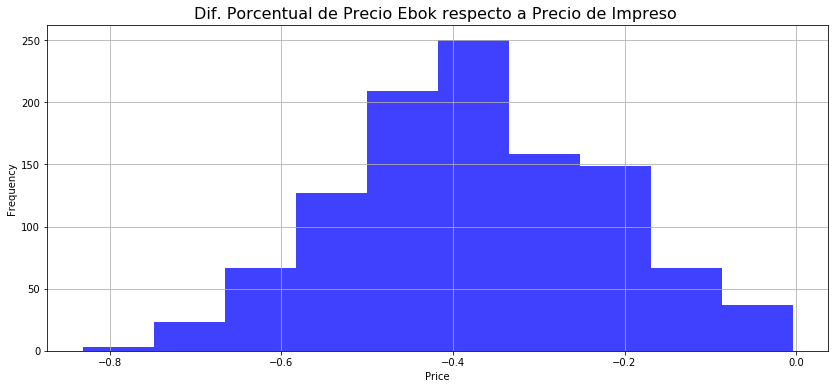

In [293]:
# bin_values = np.arange(start=1000, stop=300000, step=5000)
dfc[regla].Comparativo.plot.hist( figsize=[14,6], facecolor='blue', alpha=0.75)
plt.grid(True)
plt.xlabel('Price')
plt.title('Dif. Porcentual de Precio Ebok respecto a Precio de Impreso ', fontsize=16);

In [283]:
xl = df[impreso].groupby('Cat').agg(['mean'])['Precio'].sort_values(by='mean', ascending=False)
xe = df[ebook].groupby('Cat').agg(['mean'])['Precio'].sort_values(by='mean', ascending=False)

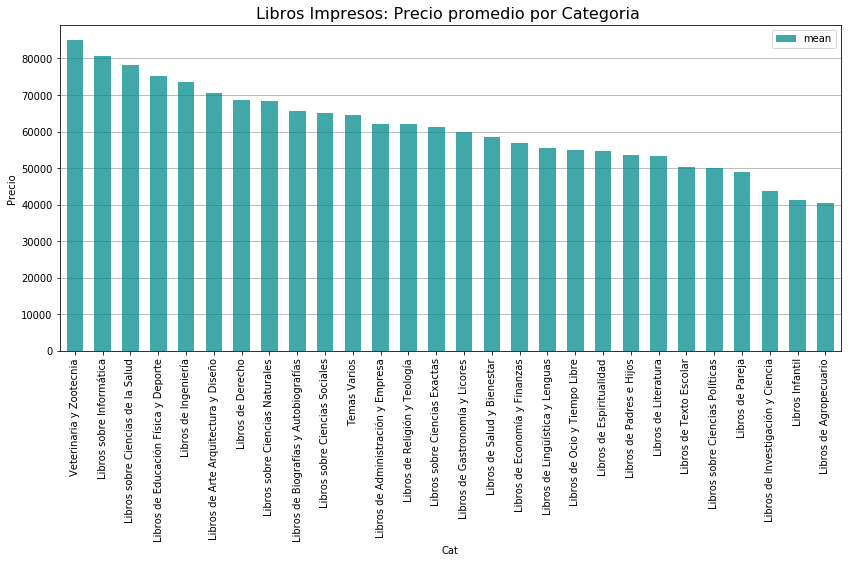

In [327]:
xl.plot.bar(figsize=[14,6], facecolor='darkcyan', alpha=0.75, zorder=3, width=.6)
plt.grid(axis='y',zorder=0)
plt.ylabel('Precio')
plt.title('Libros Impresos: Precio promedio por Categoria ', fontsize=16);

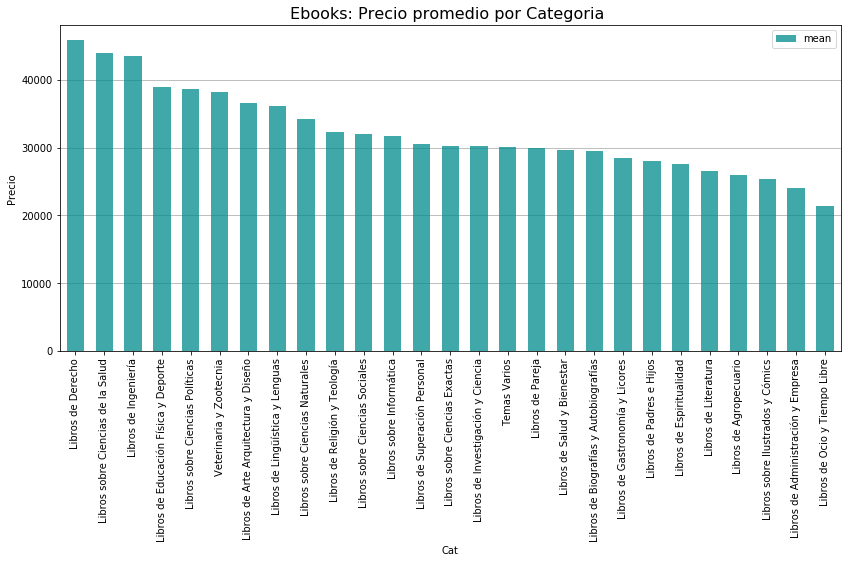

In [305]:
xe.plot.bar(figsize=[14,6], facecolor='darkcyan', alpha=0.75, zorder=3,  width=.6)
plt.grid(axis='y',zorder=0)
plt.ylabel('Precio')
plt.title('Ebooks: Precio promedio por Categoria ', fontsize=16);